# Titanic_data_Survival_prediction :Logistic Regression


## Import Data


In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("gender_submission.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [10]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data Preprocessing


In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling Misising Value


In [15]:
# examine missing value on train_data
missing_value = train_data.isnull().sum()
missing_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
for feature, value in missing_value.items():
    if value != 0:
        print(feature, ":", value)

Age : 177
Cabin : 687
Embarked : 2


In [18]:
# Examine missing value on Test_data
missing_value_test = test_data.isnull().sum()
missing_value_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
for feature, value in missing_value_test.items():
    if value != 0:
        print(feature, ":", value)

Age : 86
Fare : 1
Cabin : 327


In [20]:
def handleMissingvalue(df):
    new_df = df.copy()  # Corrected: Added parentheses to call the copy() method

    # Fill null values in 'Age' with mean age and 'Embarked' with mode Embarked
    new_df["Age"] = new_df["Age"].fillna(new_df["Age"].mean())
    new_df["Embarked"] = new_df["Embarked"].fillna(
        new_df["Embarked"].mode()[0]
    )  # Corrected: Added [0] to access the mode value

    # Median fare for each Pclass
    median_fare_by_pclass = new_df.groupby("Pclass")[
        "Fare"
    ].median()  # Corrected: Changed 'train_data' to 'new_df'
    new_df["Fare"] = new_df.apply(
        lambda row: median_fare_by_pclass[row["Pclass"]]
        if pd.isnull(row["Fare"])
        else row["Fare"],
        axis=1,
    )

    # Drop 'Cabin' column
    new_df = new_df.drop("Cabin", axis=1)

    return new_df


train_data_missing_handled = handleMissingvalue(train_data)

In [21]:
train_data_missing_handled.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train_data_missing_handled.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
train_data_missing_handled = handleMissingvalue(train_data)

if sum(train_data_missing_handled.isnull().sum().tolist()) == 0:
    print("No Missing value")

No Missing value


### Remove Duplicate value


In [25]:
# Check duplicate
train_data_missing_handled.duplicated().sum()

0

### Dealing with Outliers


In [26]:
train_data_missing_handled.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
def outlier(feature):
    plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)

    # Create a box plot
    sns.boxplot(y=train_data_missing_handled[feature])

    # Customize the plot (optional)
    plt.title("Box Plot")

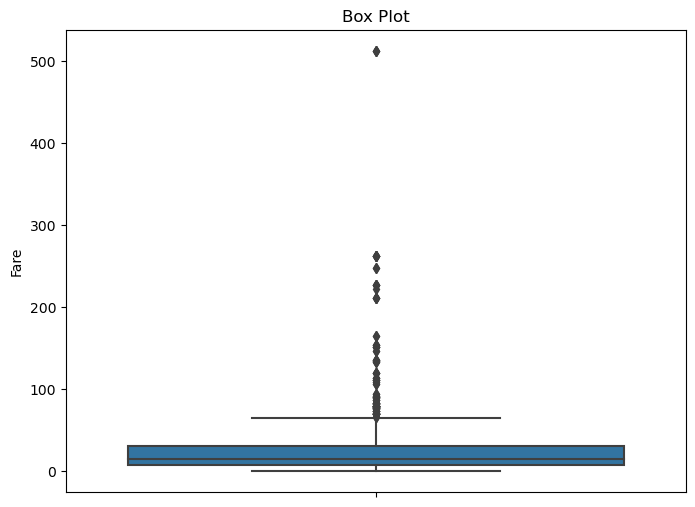

In [29]:
outlier("Fare")

In [30]:
Q1 = train_data_missing_handled["Fare"].quantile(0.25)
Q3 = train_data_missing_handled["Fare"].quantile(0.75)
IQR = Q3 - Q1

In [31]:
# CALCULATE LOWER BOUND AND UPPER BOUND FOR OUTLIER

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  -26.724
Upper Bound:  65.6344


In [34]:
train_data_missing_handled["Fare"] = train_data_missing_handled["Fare"].apply(
    lambda x: lower_bound
    if x < lower_bound
    else (upper_bound if x > upper_bound else x)
)

In [35]:
train_data_missing_handled["Fare"].max()

65.6344

In [36]:
train_data["Fare"].max()

512.3292

In [37]:
train_data_missing_handled["Fare"]

0       7.2500
1      65.6344
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

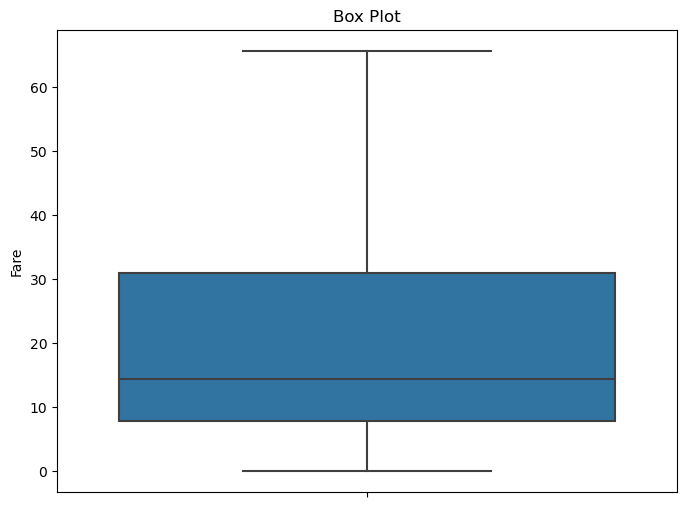

In [38]:
outlier("Fare")

In [39]:
train_dataset = train_data_missing_handled.copy()

In [40]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


In [41]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [42]:
train_dataset.duplicated().sum()

0

In [43]:
train_dataset.isnull().sum().sum()

0

In [44]:
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## Exploratory Data Analysis


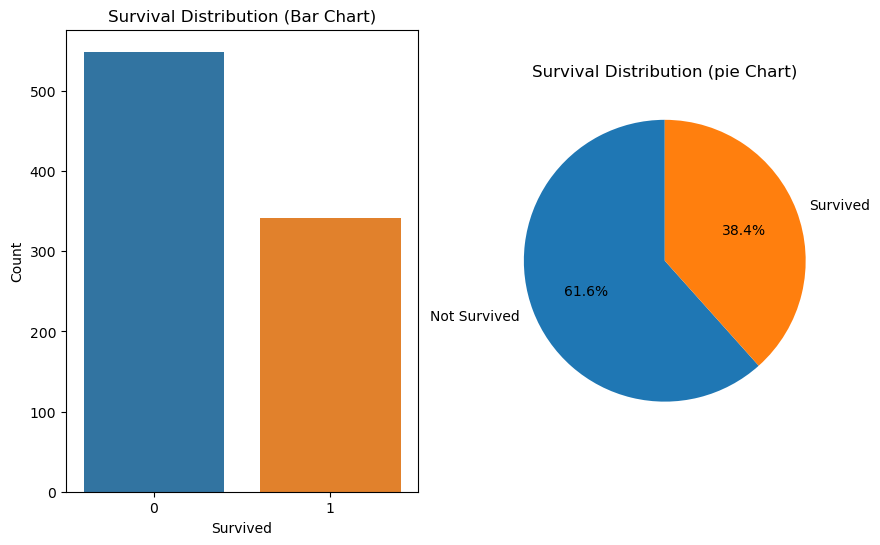

In [50]:
# Now we are going to count the number of survival or not survival
survival_counts = train_dataset["Survived"].value_counts()
survival_counts

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="Survived", data=train_dataset)

plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Survival Distribution (Bar Chart)")

# pie chart
plt.subplot(1, 2, 2)
plt.pie(
    survival_counts,
    labels=["Not Survived", "Survived"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Survival Distribution (pie Chart)")
plt.show()

In [49]:
survival_counts

Survived
0    549
1    342
Name: count, dtype: int64

In [51]:
female_Survival_counts = train_dataset[train_dataset["Sex"] == "female"][
    "Survived"
].value_counts()
male_Survival_counts = train_dataset[train_dataset["Sex"] == "male"][
    "Survived"
].value_counts()

female_Survival_counts, male_Survival_counts

(Survived
 1    233
 0     81
 Name: count, dtype: int64,
 Survived
 0    468
 1    109
 Name: count, dtype: int64)

#### Check Servival Based On Gender


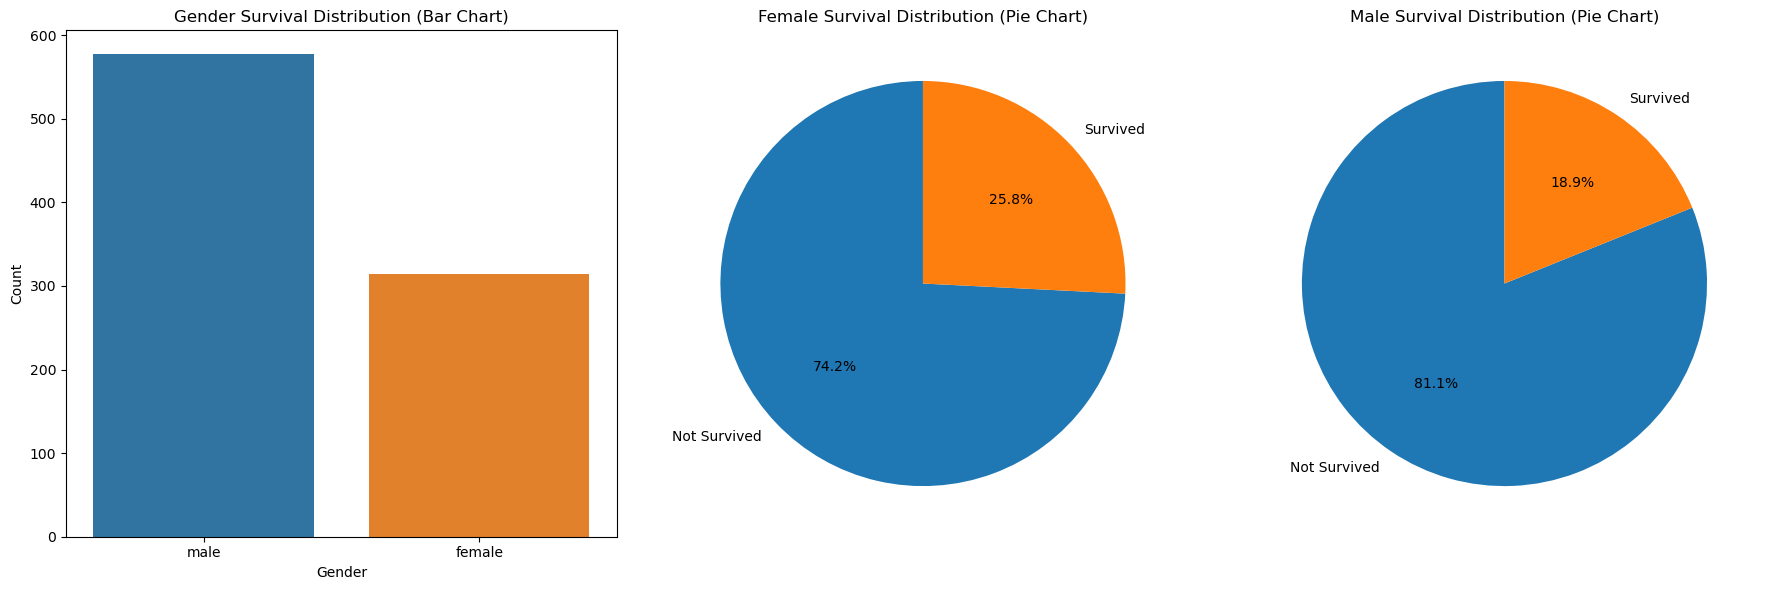

In [53]:
plt.figure(figsize=(18, 6))

# First subplot: countplot for gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x="Sex", data=train_dataset)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Survival Distribution (Bar Chart)")

# Assuming female_Survival_counts and male_Survival_counts are defined and contain appropriate counts
# Second subplot: pie chart for female survival distribution
plt.subplot(1, 3, 2)
plt.pie(
    female_Survival_counts,
    labels=["Not Survived", "Survived"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Female Survival Distribution (Pie Chart)")

# Third subplot: pie chart for male survival distribution
plt.subplot(1, 3, 3)
plt.pie(
    male_Survival_counts,
    labels=["Not Survived", "Survived"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Male Survival Distribution (Pie Chart)")

plt.tight_layout()
plt.show()

#### Survival relation with Age


In [54]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [55]:
# I'mgoing to define the age group
age_min = train_dataset["Age"].min()
age_max = train_dataset["Age"].max()
age_min, age_max

(0.42, 80.0)

In [56]:
age_bins = age_bins = [age_min, 12, 24, 36, 48, 60, age_max]
age_labels = ["0-12", "13-24", "25-36", "36-48", "49-60", "61+"]

train_data_modified = train_dataset.copy()

# Bins the age groups
train_data_modified["age_group"] = pd.cut(
    train_data_modified["Age"], bins=age_bins, labels=age_labels
)

In [57]:
train_data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,13-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,36-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,25-36
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,25-36
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,25-36


C:\Users\HP\AppData\Local\Temp\ipykernel_9340\1823907301.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age_group',y='Survived',data=train_data_modified,ci=None)


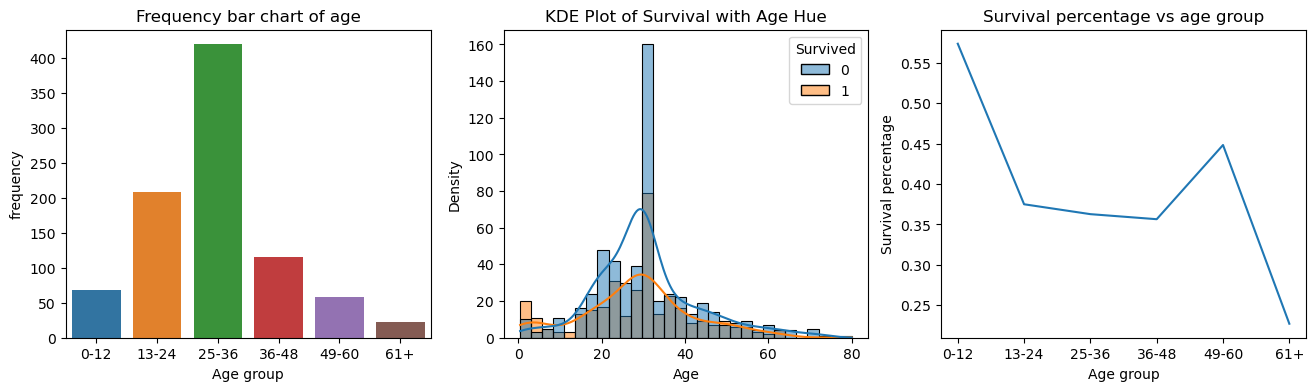

In [59]:
plt.figure(figsize=(16, 4))
# Bar chart for Age frequencies
plt.subplot(1, 3, 1)
sns.countplot(x="age_group", data=train_data_modified)
plt.xlabel("Age group")
plt.ylabel("frequency")
plt.title("Frequency bar chart of age")

# KDE plot of survival with age as hue
plt.subplot(1, 3, 2)
sns.histplot(x="Age", data=train_data_modified, hue="Survived", kde=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot of Survival with Age Hue")


#  Line Plot representing survival percentage of each age group
plt.subplot(1, 3, 3)
sns.lineplot(x="age_group", y="Survived", data=train_data_modified, ci=None)
plt.xlabel("Age group")
plt.ylabel("Survival percentage")
plt.title("Survival percentage vs age group")
plt.show()

#### class vs Survival


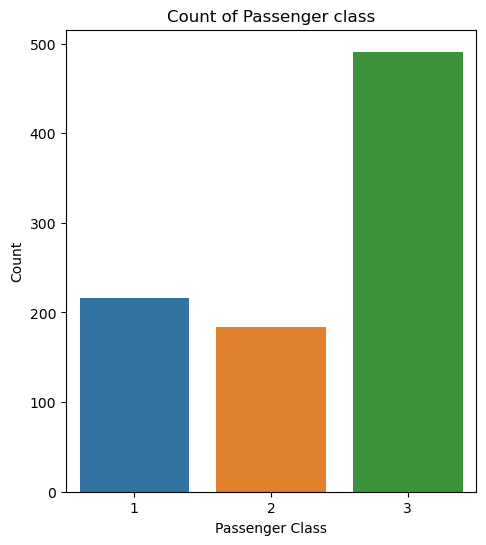

In [61]:
plt.figure(figsize=(18, 6))

# First subplot: countplot for gender distribution
plt.subplot(1, 3, 1)
sns.countplot(x="Pclass", data=train_data_modified)
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Count of Passenger class")
plt.show()

#### Feature Engineering and Feature Selection


In [62]:
train_data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,13-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,36-48
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,25-36
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,25-36
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,25-36


##### Drop Unnessary columns


In [63]:
unnecessary_column = ["PassengerId", "Name", "Ticket", "Age"]
train_data_modified.drop(unnecessary_column, axis=1, inplace=True)

In [64]:
# Rename column
train_data_modified.rename(columns={"age_group": "Age"}, inplace=True)

In [65]:
train_data_modified

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,male,1,0,7.2500,S,13-24
1,1,1,female,1,0,65.6344,C,36-48
2,1,3,female,0,0,7.9250,S,25-36
3,1,1,female,1,0,53.1000,S,25-36
4,0,3,male,0,0,8.0500,S,25-36
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,25-36
887,1,1,female,0,0,30.0000,S,13-24
888,0,3,female,1,2,23.4500,S,25-36
889,1,1,male,0,0,30.0000,C,25-36


In [66]:
train_data_modified.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age'],
      dtype='object')

##### Feature Hot Encoding


In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
# convert type
new_df = train_data_modified.copy()
# Specify the columns to be one-hot encoded
columns_to_encode = ["Pclass", "Sex", "Age", "Embarked", "SibSp"]
new_df = pd.get_dummies(new_df, columns=columns_to_encode, dtype=int)

In [70]:
# Apply min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df["Fare"] = scaler.fit_transform(new_df[["Fare"]])

In [71]:
new_df

,Survived,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_0-12,Age_13-24,...,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,0,0.110460,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1.000000,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0.120745,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1,0,0.809027,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0.122649,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.198067,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
887,1,0,0.457077,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
888,0,2,0.357282,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
889,1,0,0.457077,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0


## Model Training , Evaluation


In [72]:
## Train Test Split

from sklearn.model_selection import train_test_split

In [73]:
X = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

# split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [74]:
X_train.shape, X_test.shape

((712, 23), (179, 23))

In [75]:
y_train.shape, y_test.shape

((712,), (179,))

### Model Training


In [76]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

In [77]:
# To store accuracy, precision, recall, f1_score
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()

### Logistic Regression model


In [78]:
from sklearn.linear_model import LogisticRegression

# Logidtic Regression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)


accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy["Logistic Regression"] = accuracy_logistic
precision_logistic = precision_score(y_test, y_pred_logistic)
precision["Logistic Regression"] = precision_logistic
recall_logistic = recall_score(y_test, y_pred_logistic)
recall["Logistic Regression"] = recall_logistic

f1_logistic = f1_score(y_test, y_pred_logistic)
f1["Logistic Regression"] = f1_logistic
print("Logistic Regression Accuracy: {:.3f}%".format(accuracy_logistic * 100))

Logistic Regression Accuracy: 79.888%
